In [294]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt
import warnings

a = 1.0
b = 0.9
tspan = np.linspace(0.0, 5.0, 5002)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 + a*x**2)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)

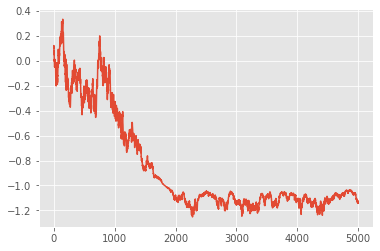

In [295]:
plt.plot(np.arange(0,np.array(result.shape[0])),result)

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [297]:
score=0

xvals=np.arange(0,np.array(result.shape[0]))
yvals=result

preds=[]

num_points=5

for i in range(0,num_points+1):
    preds.append(xvals[i])

In [298]:
for i in np.arange(num_points,np.array(xvals).shape[0],1):
    x_pairs=[]
    y_pairs=[]

    for j in np.arange(0,num_points+1):
        x_pairs.append(xvals[i-j])
        y_pairs.append(yvals[i-j])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(xvals).shape[0]-1:
        
        regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        
        regression.fit(x_pairs, y_pairs)
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        
        preds.append(pred)
        
        if np.sign(pred-yvals[i])==np.sign(yvals[i+1]-yvals[i]):
            score=score+1
        else:
            score=score-1
    else:
        
        pass

In [299]:
score

-108